<a href="https://colab.research.google.com/github/mauliek123/Stock-Prices-Extraction/blob/main/Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

headers = {'user-agent':'Mozilla/5.0 \
            (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/84.0.4147.105 Safari/537.36'}


In [ ]:
urls = [
    'https://groww.in/us-stocks/nke',
    'https://groww.in/us-stocks/ko',
    'https://groww.in/us-stocks/msft',
    'https://groww.in/us-stocks/axp',
    'https://groww.in/us-stocks/amgn',
    'https://groww.in/us-stocks/aapl',
    'https://groww.in/us-stocks/ba',
    'https://groww.in/us-stocks/csco',
    'https://groww.in/us-stocks/gs',
    'https://groww.in/us-stocks/ibm',
    'https://groww.in/us-stocks/intc',
    'https://groww.in/us-stocks/jpm',
    'https://groww.in/us-stocks/mcd',
    'https://groww.in/us-stocks/crm',
    'https://groww.in/us-stocks/vz',
    'https://groww.in/us-stocks/v',
    'https://groww.in/us-stocks/wmt',
    'https://groww.in/us-stocks/dis'
    ]

In [ ]:
all=[]
for url in urls:
    page = requests.get(url,headers=headers)
    try:
        soup = BeautifulSoup(page.text, 'html.parser')

        company= soup.find('h1',{'class': 'usph14Head displaySmall'}).text
        price = soup.find('span', {'class': 'uht141Pri contentPrimary displayBase'}).text

        change = None
        p_change = soup.find('div', {'class': 'uht141Day bodyBaseHeavy contentPositive'})
        if p_change:
          change= p_change.text.strip()
        #for negative change element id changed
        if not change:
          s_change = soup.find('div', {'class': 'uht141Day bodyBaseHeavy contentNegative'})
          if s_change:
            change =s_change.text.strip()




        table = soup.find('table', {'class': 'tb10Table width100 usp100NoBorder usp100Table'})
        volume_td = table.find_all('td', {'class': 'col l3 bodyLargeHeavy'})[2]
        volume = volume_td.text.strip()

        x=[company,price,change,volume]
        all.append(x)

    except AttributeError:
      print("Change the Element id")
    # Wait for a short time to avoid rate limiting
    time.sleep(2)



In [ ]:
column_names = ["Company", "Price","Change","Volume"]
df = pd.DataFrame(columns=column_names)
for i in all:
    index = 0
    df.loc[index] = i
    df.index = df.index + 1
df = df.reset_index(drop=True)
df

,Company,Price,Change,Volume
0,Nike Inc,$78.77,+0.43(0.55%) 1D,"7,123,471"
1,Coca-Cola Company The,$64.08,+0.14(0.21%) 1D,"10,648,354"
2,Microsoft Corporation,$423.46,+0.47(0.11%) 1D,"16,271,921"
3,American Express Co,$304.68,+0.43(0.14%) 1D,"1,326,646"
4,Amgen Inc,$282.87,+2.80(1.00%) 1D,"2,232,846"
5,Apple Inc,$237.33,+2.40(1.02%) 1D,"28,481,377"
6,Boeing Company The,$155.44,+3.04(1.99%) 1D,"7,100,090"
7,Cisco Systems Inc,$59.21,-0.08(0.13%) 1D,"11,618,360"
8,Goldman Sachs Group Inc The,$608.57,+3.14(0.52%) 1D,"1,170,180"
9,International Business Machines Corp,$227.41,+0.49(0.22%) 1D,"2,640,253"


In [ ]:
df.to_excel('stocks.xlsx')

In [1]:
pip install neo4j py2neo


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 10.2 MB/s eta 0:00:00


In [4]:
!pip install py2neo
!apt-get install docker.io
!dockerd --daemon &
!docker run -d --rm --name neo4j -p 7687:7687 -p 7474:7474 -e NEO4J_AUTH=neo4j/password neo4j


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  apparmor bridge-utils containerd dns-root-data dnsmasq-base iptables libip6tc2
  libnetfilter-conntrack3 libnfnetlink0 libnftnl11 netbase netcat netcat-openbsd runc ubuntu-fan
Suggested packages:
  apparmor-profiles-extra apparmor-utils ifupdown aufs-tools btrfs-progs cgroupfs-mount
  | cgroup-lite debootstrap docker-buildx docker-compose-v2 docker-doc rinse zfs-fuse | zfsutils
  firewalld nftables
The following NEW packages will be installed:
  apparmor bridge-utils containerd dns-root-data dnsmasq-base docker.io iptables libip6tc2
  libnetfilter-conntrack3 libnfnetlink0 libnftnl11 netbase netcat netcat-openbsd runc ubuntu-fan
0 upgraded, 16 newly installed, 0 to remove and 29 not upgraded.
Need to get 79.9 MB of archives.
After this operation, 307 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/m

In [9]:
!pip install py2neo
from py2neo import Graph, Node, Relationship

# Replace with your Neo4j AuraDB credentials
NEO4J_URI = "neo4j+s://7e91417e.databases.neo4j.io"
USERNAME = "neo4j"
PASSWORD = "i_0MZLJOT21IUFWy5D91MPGEu3UkWV_zgcUI3uPZZpY"

# Connect to Neo4j AuraDB
graph = Graph(NEO4J_URI, auth=(USERNAME, PASSWORD))
print("✅ Connected to Neo4j AuraDB!")


✅ Connected to Neo4j AuraDB!


In [10]:
# Create a StockMarket node
market = Node("StockMarket", name="NYSE")
graph.merge(market, "StockMarket", "name")

# Sample stock data
all_data = [
    ["Cisco Systems Inc", 59.21, -0.08, 11618360],
    ["Goldman Sachs", 608.57, 3.14, 1170180],
    ["Intel Corporation", 24.05, 0.40, 36616750],
]

# Insert data into Neo4j
for stock in all_data:
    company_name, price, change, volume = stock

    company = Node("Company", name=company_name, price=price, change=change, volume=volume)
    graph.merge(company, "Company", "name")

    graph.merge(Relationship(company, "LISTED_IN", market))

print("✅ Stock data inserted into Neo4j!")


✅ Stock data inserted into Neo4j!


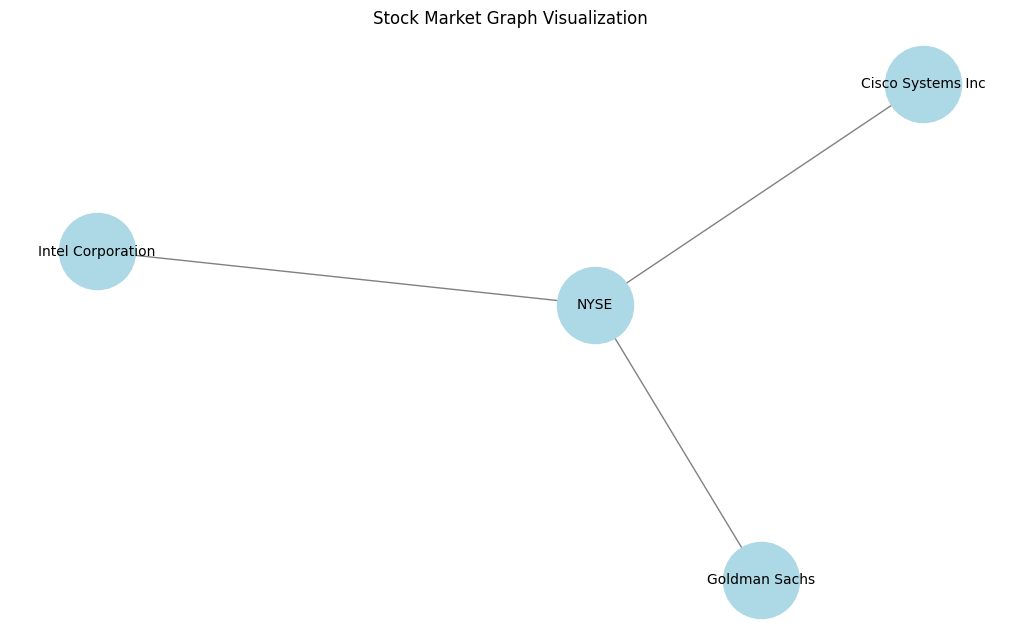

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from py2neo import Graph

# 🔹 Replace with your Neo4j AuraDB credentials
NEO4J_URI = "neo4j+s://7e91417e.databases.neo4j.io"  # Replace with your actual URI
USERNAME = "neo4j"
PASSWORD = "i_0MZLJOT21IUFWy5D91MPGEu3UkWV_zgcUI3uPZZpY"

# Connect to Neo4j
graph = Graph(NEO4J_URI, auth=(USERNAME, PASSWORD))

# 🔹 Query the database to get companies and their relationships
query = """
MATCH (c:Company)-[:LISTED_IN]->(m:StockMarket)
RETURN c.name AS company, m.name AS market
"""

data = graph.run(query).data()

# Create a graph using NetworkX
G = nx.Graph()

# Add nodes and edges
for record in data:
    company = record["company"]
    market = record["market"]

    G.add_node(company, type="Company")
    G.add_node(market, type="StockMarket")
    G.add_edge(company, market)  # Create edge

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=3000, font_size=10)

plt.title("Stock Market Graph Visualization")
plt.show()


In [13]:
query = """
MATCH (c:Company)-[:LISTED_IN]->(m:StockMarket)
RETURN c.name AS Company, m.name AS Market
"""

result = graph.run(query).data()

# Print the results
for record in result:
    print(record)


{'Company': 'Cisco Systems Inc', 'Market': 'NYSE'}
{'Company': 'Goldman Sachs', 'Market': 'NYSE'}
{'Company': 'Intel Corporation', 'Market': 'NYSE'}


In [15]:
query = """
MATCH (c:Company)
RETURN c.name AS Company, c.volume AS TradingVolume
ORDER BY toInteger(c.volume) DESC
LIMIT 5
"""

result = graph.run(query).data()

# Print the results
for record in result:
    print(record)


{'Company': 'Intel Corporation', 'TradingVolume': 36616750}
{'Company': 'Cisco Systems Inc', 'TradingVolume': 11618360}
{'Company': 'Goldman Sachs', 'TradingVolume': 1170180}


In [11]:
query = """
MATCH (c:Company)-[:LISTED_IN]->(:StockMarket {name: "NYSE"})
RETURN c.name, c.price, c.change, c.volume
"""

result = graph.run(query).data()
print(result)


[{'c.name': 'Cisco Systems Inc', 'c.price': 59.21, 'c.change': -0.08, 'c.volume': 11618360}, {'c.name': 'Goldman Sachs', 'c.price': 608.57, 'c.change': 3.14, 'c.volume': 1170180}, {'c.name': 'Intel Corporation', 'c.price': 24.05, 'c.change': 0.4, 'c.volume': 36616750}]
